In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [212]:
df = pd.read_csv('ALZdataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [213]:
df.shape

(373, 15)

In [214]:
#replacing the targeg class with numerical values.
df['Group'].replace(['Nondemented','Demented','Converted',],[0,1,2],inplace=True)

In [215]:
#replacing the targeg M/F with numerical values.
df['M/F'].replace(['M','F'],[0,1],inplace=True)

In [216]:
df = df.drop(['Visit','MRI ID','Hand'],axis=1)

In [217]:
df.isnull().sum()

Subject ID     0
Group          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [218]:
df[['SES','MMSE']].describe()

,SES,MMSE
count,354.000000,371.000000
mean,2.460452,27.342318
std,1.134005,3.683244
min,1.000000,4.000000
25%,2.000000,27.000000
50%,2.000000,29.000000
75%,3.000000,30.000000
max,5.000000,30.000000


In [219]:
df['SES'].replace(np.nan,df['SES'].mean(),inplace=True)
df['SES'].isnull().sum()

0

In [220]:
df['MMSE'].replace(np.nan,df['MMSE'].mean(),inplace=True)
df['MMSE'].isnull().sum()

0

In [221]:
df.isnull().sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [222]:
df.shape

(373, 12)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    int64  
 2   MR Delay    373 non-null    int64  
 3   M/F         373 non-null    int64  
 4   Age         373 non-null    int64  
 5   EDUC        373 non-null    int64  
 6   SES         373 non-null    float64
 7   MMSE        373 non-null    float64
 8   CDR         373 non-null    float64
 9   eTIV        373 non-null    int64  
 10  nWBV        373 non-null    float64
 11  ASF         373 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 35.1+ KB


<h3>EDA</h3>

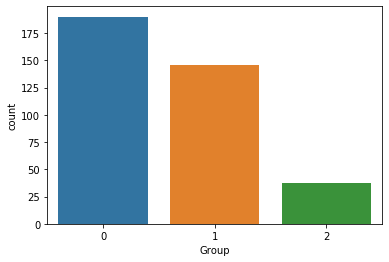

In [224]:
sns.countplot(df['Group'])

<b>Explorator Data Analysis (EDA)</b> --- Help us understand our data better

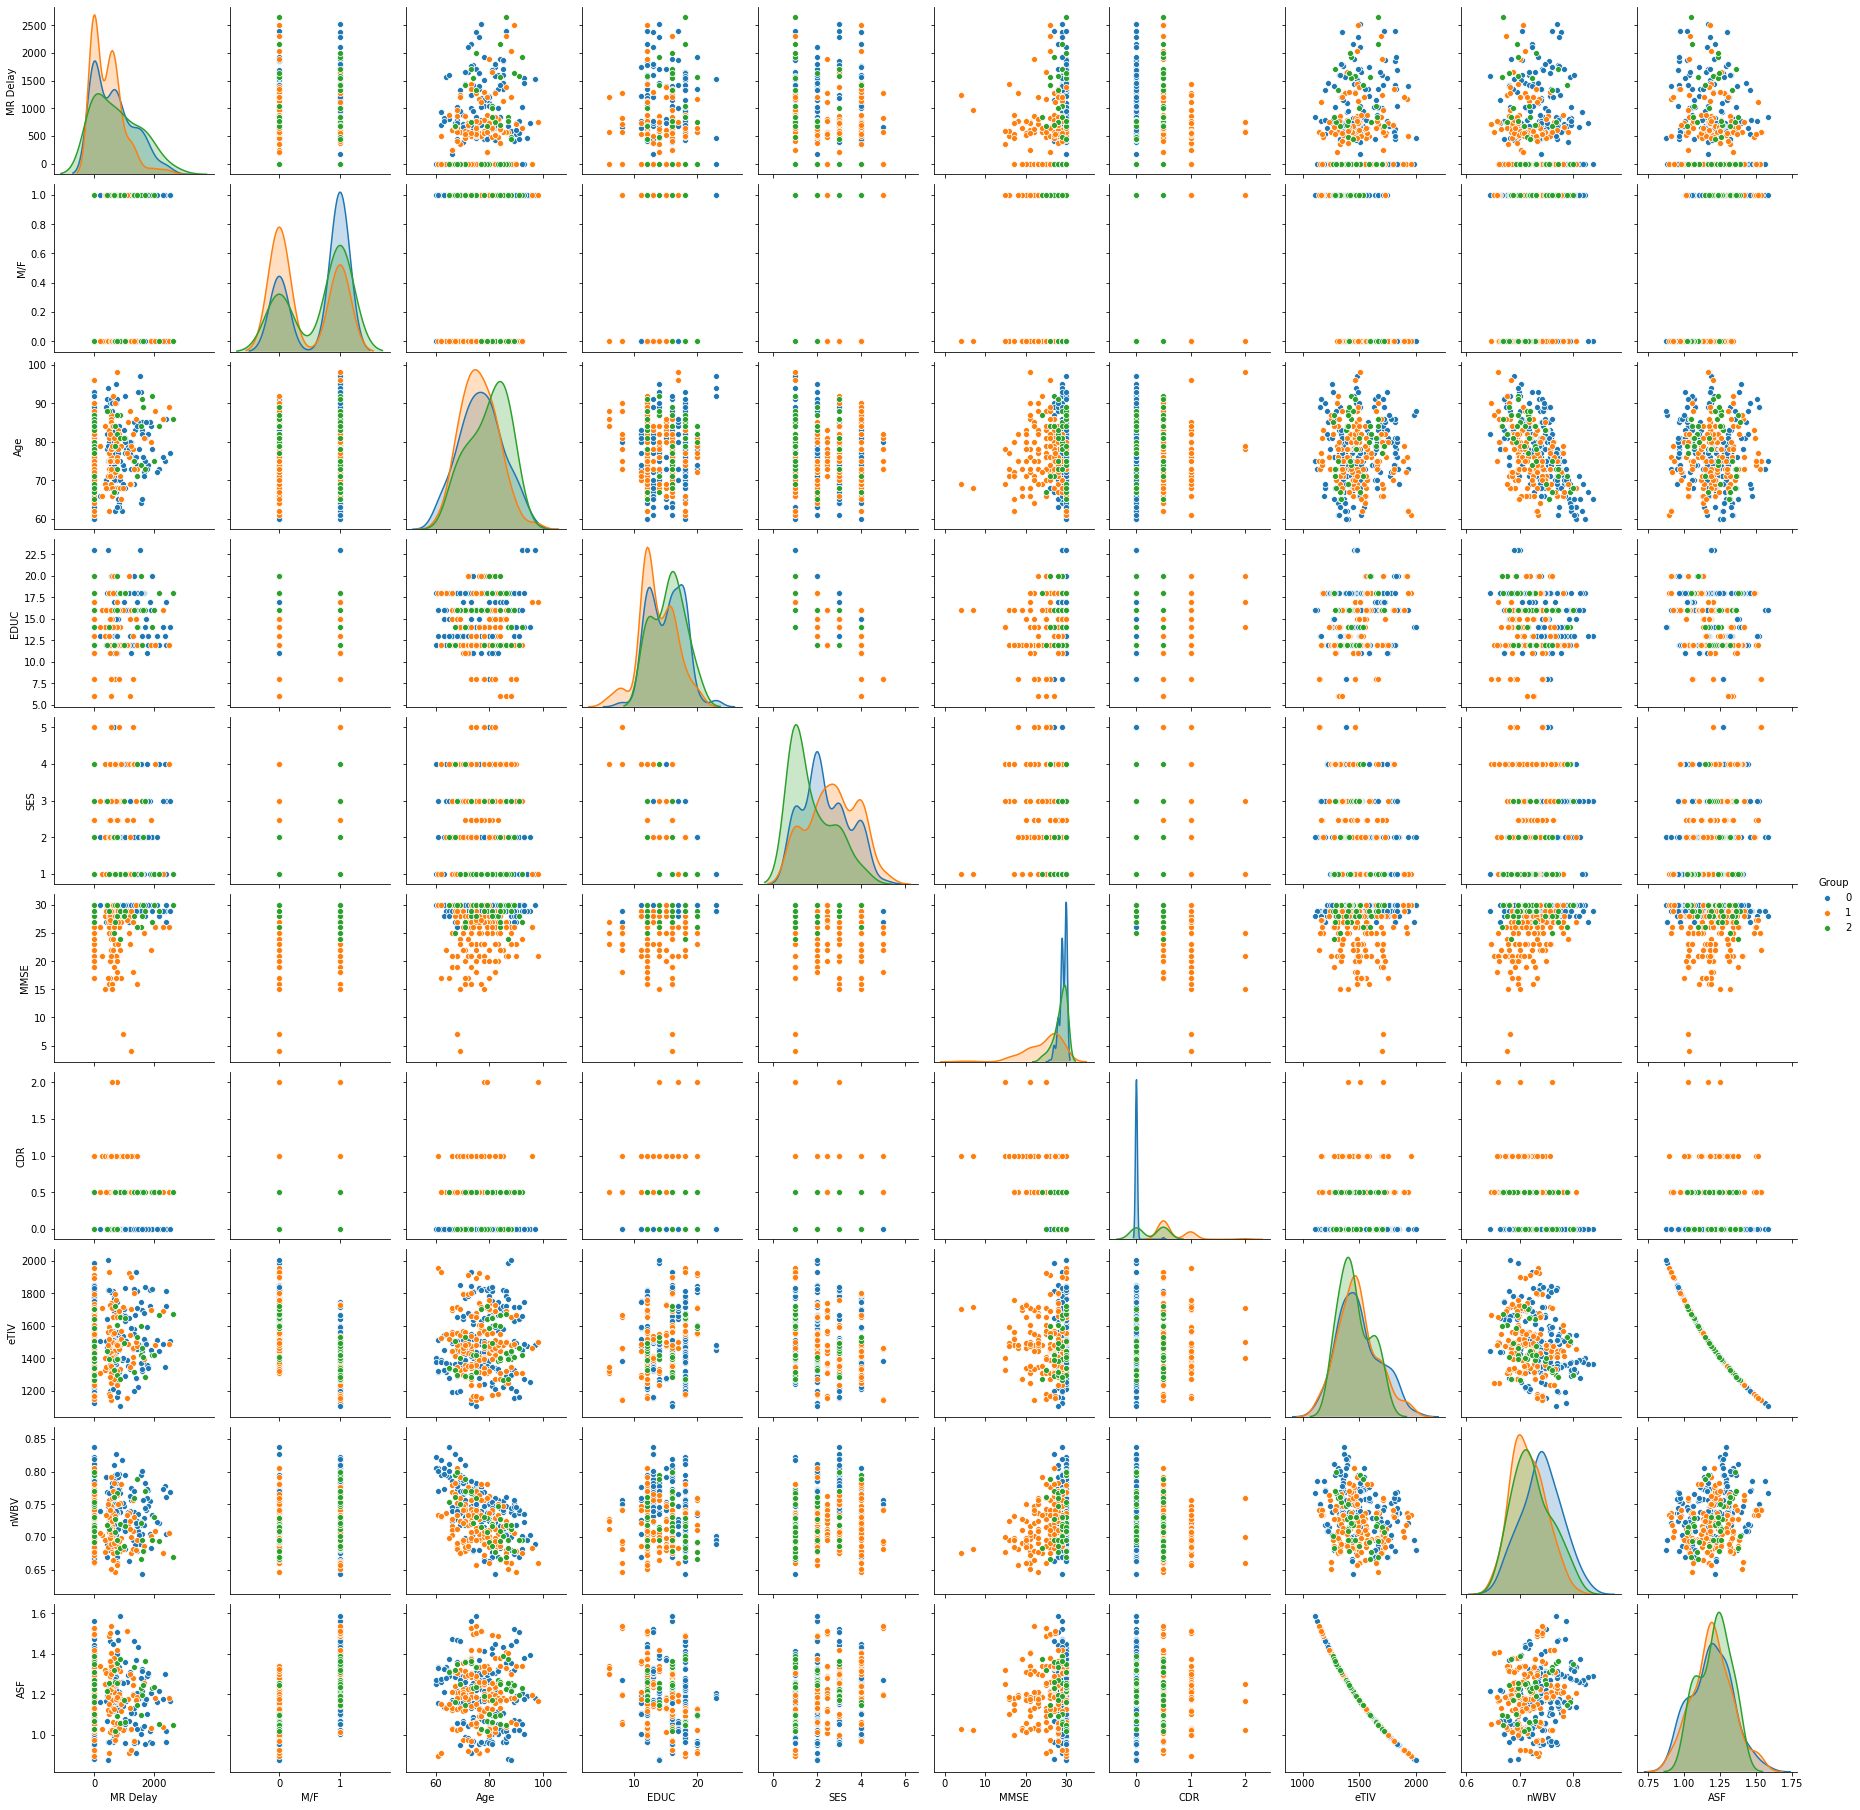

In [225]:
sns.pairplot(data=df, vars=['MR Delay','M/F','Age',
                           'EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF'], hue='Group')
plt.show()

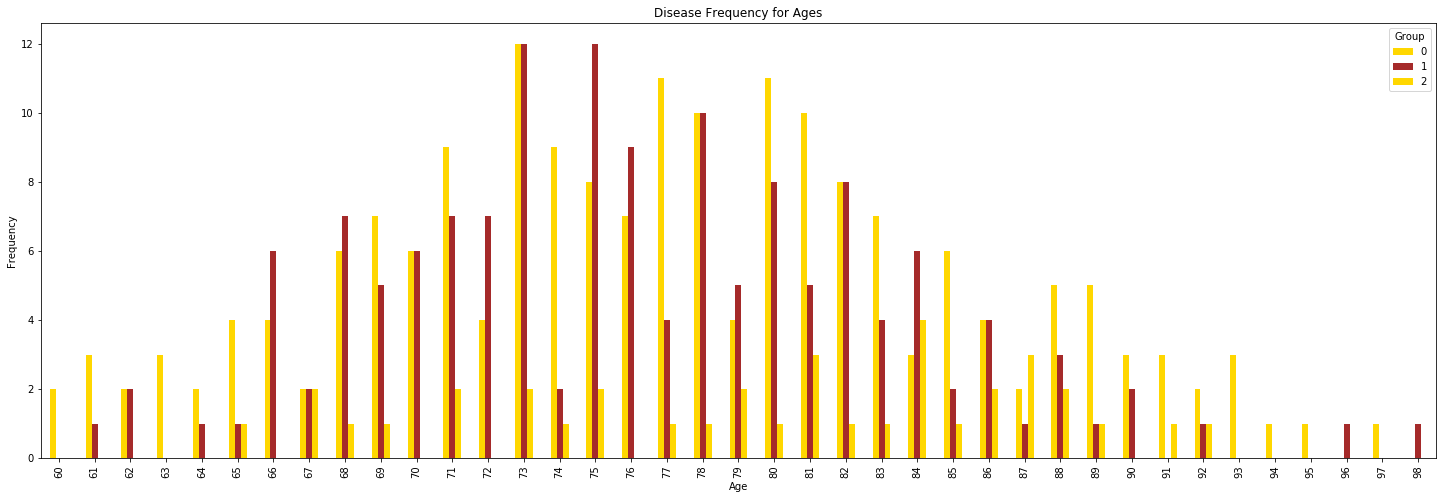

In [15]:
pd.crosstab(df['Age'],df['Group']).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

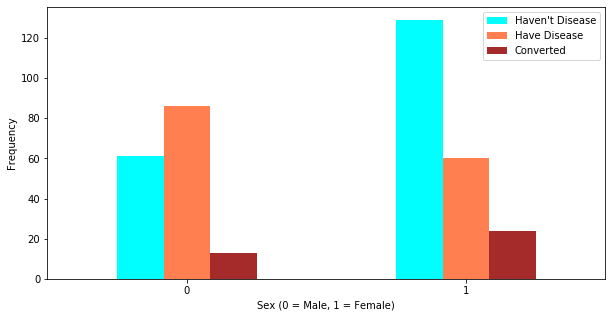

In [16]:
pd.crosstab(df['M/F'],df['Group']).plot(kind="bar",figsize=(10,5),color=['cyan','coral','brown' ])
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease",'Converted'])
plt.ylabel('Frequency')
plt.show()

In [17]:
df['Group'].unique()

array([0, 1, 2], dtype=int64)

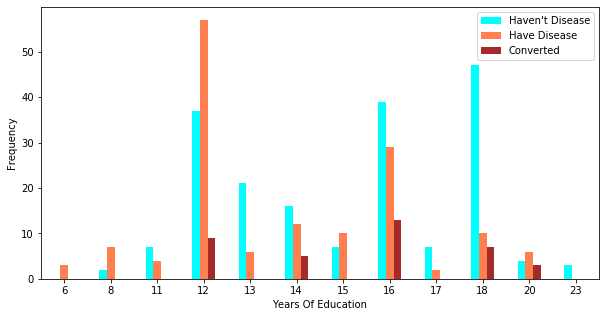

In [18]:
pd.crosstab(df['EDUC'],df['Group']).plot(kind="bar",figsize=(10,5),color=['cyan','coral','brown' ])
plt.xlabel('Years Of Education')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease",'Converted'])
plt.ylabel('Frequency')
plt.show()

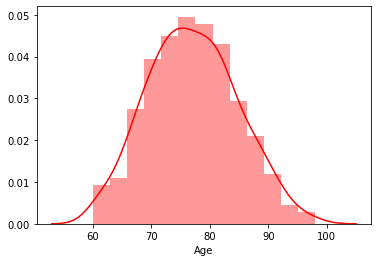

In [24]:
sns.distplot(df['Age'], color='r')
plt.show()

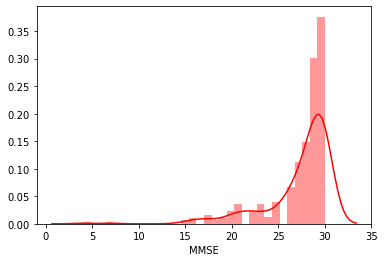

In [25]:
sns.distplot(df['MMSE'], color='r')
plt.show()

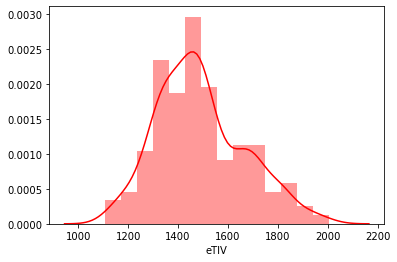

In [26]:
sns.distplot(df['eTIV'], color='r')
plt.show()

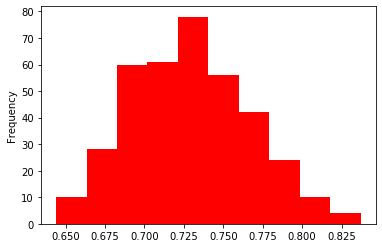

In [27]:
df['nWBV'].plot(kind='hist', color='r')
plt.show()

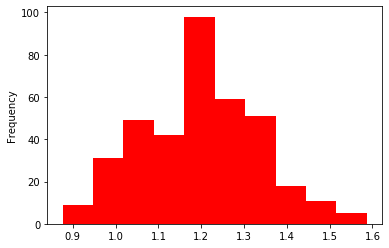

In [29]:
df['ASF'].plot(kind='hist', color='r')
plt.show()

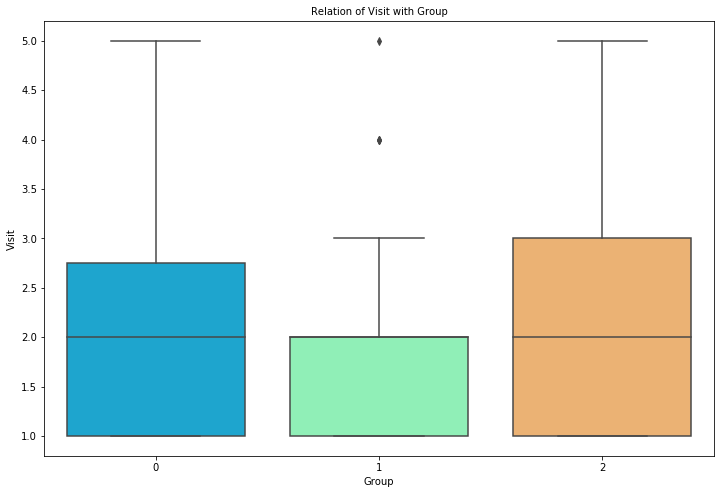

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Group'], df['Visit'], palette = 'rainbow')
plt.title('Relation of Visit with Group', fontsize = 10)
plt.show()

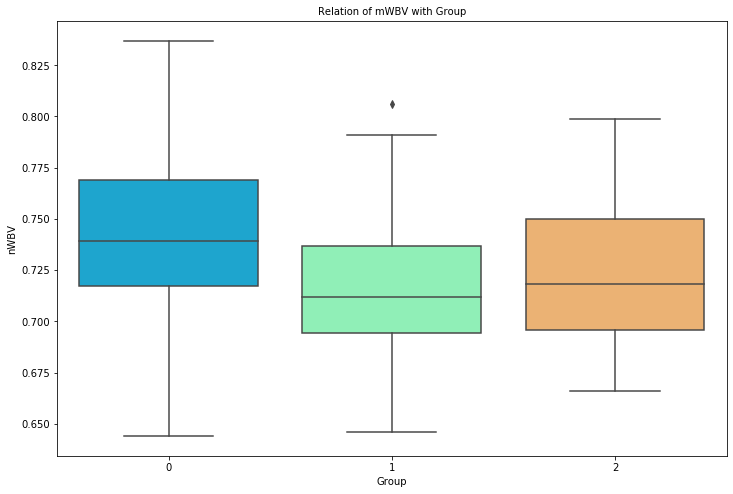

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Group'], df['nWBV'], palette = 'rainbow')
plt.title('Relation of mWBV with Group', fontsize = 10)
plt.show()

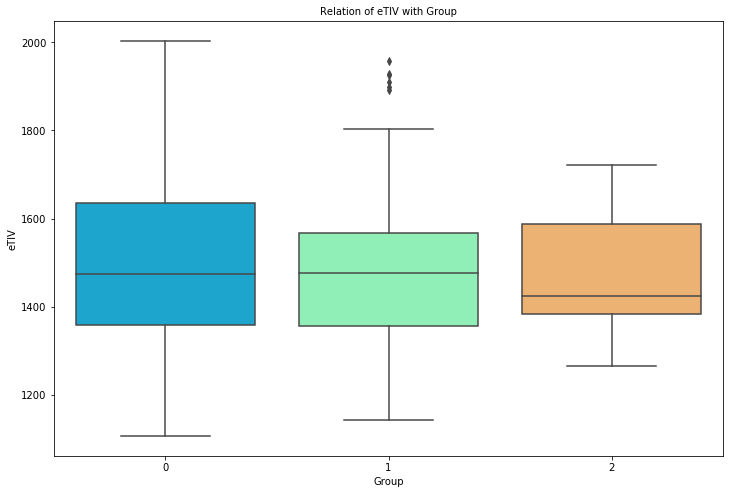

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Group'], df['eTIV'], palette = 'rainbow')
plt.title('Relation of eTIV with Group', fontsize = 10)
plt.show()

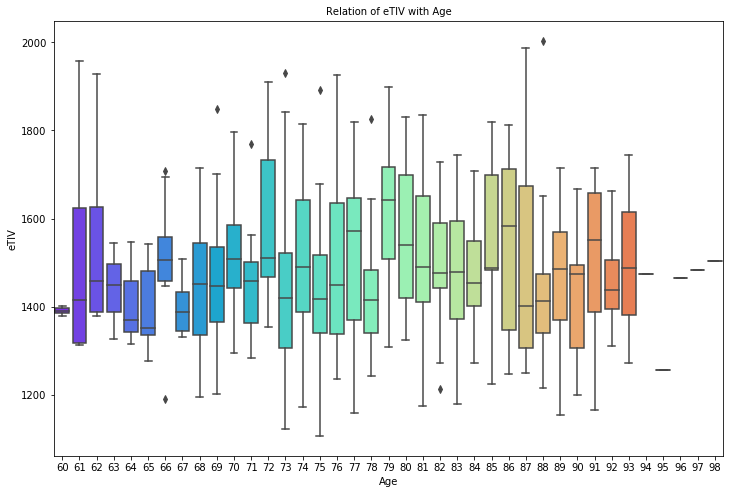

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Age'], df['eTIV'], palette = 'rainbow')
plt.title('Relation of eTIV with Age', fontsize = 10)
plt.show()

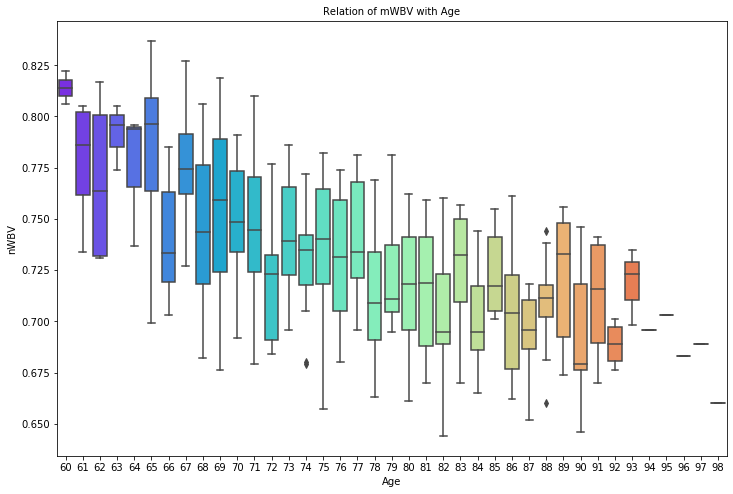

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Age'], df['nWBV'], palette = 'rainbow')
plt.title('Relation of mWBV with Age', fontsize = 10)
plt.show()

In [226]:
y = df['Group']
X = df.drop(['Subject ID','Group'],axis=1)

In [227]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:

#USING RANDOM FOREST CLASSIFIER
RF = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
#TRYING TO GET THE OPTIMAL FEATURES TO BE USED BY THE CLASSIFIER 
param_grid = {
     "n_estimators": [10,100,500],
     "max_depth": [1,5,10,15],
     "min_samples_leaf": [1,2,3,4,5,10,15,20,30,40,50]
 }

GS = GridSearchCV(estimator=RF, param_grid=param_grid,n_jobs=-1, cv=10)
GS.fit(X,y)
print(GS.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.2,random_state=7,shuffle=True)

print(f'X train {len(X_train)} X test {len(X_test)} y train {len(y_train)} y test {len(y_test)}')

X train 298 X test 75 y train 298 y test 75


In [229]:
RF_model = RandomForestClassifier(n_jobs=-1,max_features='sqrt',
                                  max_depth=10,min_samples_leaf=1,n_estimators=10)

RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [230]:
pred = RF_model.predict(X_test)
RF_model.score(X_test,y_test)

0.9066666666666666

In [231]:
print(confusion_matrix(y_test,pred))

[[37  1  0]
 [ 0 28  1]
 [ 3  2  3]]


In [232]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.90      0.97      0.93        29
           2       0.75      0.38      0.50         8

    accuracy                           0.91        75
   macro avg       0.86      0.77      0.79        75
weighted avg       0.90      0.91      0.89        75



This model will actally need a better dataset for predicting the converted class properly